In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [2]:
def log_transform(df):
    # copy the dataframe
    tdf = df.copy()
    # apply log scaling
    for column in tdf.columns:
        tdf[column] = np.log(tdf[column])

    tdf.replace([np.inf, -np.inf], np.nan, inplace=True)
    tdf = tdf.astype(float)
    tdf = tdf.interpolate(method='linear', axis=0).ffill().bfill()
#     tdf = tdf.dropna(axis='columns')
    tdf = tdf.fillna(0)

    return tdf

def boxcox(df):
    # copy the dataframe
    _df = df.copy()

    # apply log scaling
    for column in _df.columns:

#         tdf[column] = stats.boxcox(tdf[column])
        _df[column] = boxcox1p(_df[column], 0.25)

#     _df = _df.dropna(axis='columns')
    _df = _df.fillna(0)
    _df = _df.astype(float)

    return _df

def min_max_scaling(df):
    # copy the dataframe
    tdf = df.copy()
    # apply min-max scaling
    for column in tdf.columns:
        tdf[column] = (tdf[column] - tdf[column].min()) / (tdf[column].max() - tdf[column].min())
#     tdf = tdf.dropna(axis='columns')
    tdf = tdf.fillna(0)
    return tdf

def unwrap_df(df):
    udf = df.copy()
    def unwrap_col(col):
        # udf[col] =  np.unwrap(2 * udf[col]) / 2
        udf[col] =  np.unwrap(udf[col])
    cols = udf.columns
    list(map(lambda col: unwrap_col(col), cols))
    return udf
            

def savgol(df):
    # copy the dataframe
    _df = df.copy()

    # apply log scaling
    for column in _df.columns:
        
        _df[column] = savgol_filter(_df[column], 9, 1)

#     _df = _df.dropna(axis='columns')
    _df = _df.fillna(0)
    _df = _df.astype(float)
    return _df



In [3]:
ticker= (


"BTCUSD" 
# "ETHUSD"       
# 'LINKUSD' 
# 'XRPUSD'    
# 'DOGEUSD'  
    
)

exportPath = '/home/u1/Data/astro/data_new/'
marketPath = '/home/u1/Data/markets/DND/'
imgPath = '/home/u1/Pictures/np/Other/'


_df = pd.read_csv(marketPath + ticker + '_DO_NOT_DELETE.csv',parse_dates = True,index_col=0)
# _df['y'] = _df[["open", "high", "low", "close"]].sum(axis=1).div(4) # (o+h+l+c)/4

_df = _df.resample('D').mean()

_df['y'] = _df[["close"]]

_df = log_transform(_df)
_df = min_max_scaling(_df)

/home/u1/Envs/Python/darts/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
astro_df = pd.read_csv(marketPath + 'slim_geoAstro.csv',parse_dates = True,index_col=0)

#######################################################################################################

# start_date = "2020-01-01"
# end_date = "2021-09-17"

# start_date = earliest
# end_date = '2021-01-01'

start_date = "2023-01-01"
end_date = "2030-12-31"
#######################################################################################################

after_start_date = astro_df.index >= start_date
before_end_date = astro_df.index <= end_date
between_two_dates = after_start_date & before_end_date
astro_df = astro_df.loc[between_two_dates]

#######################################################################################################

print(astro_df)

            geo-declination-Sun  geo-declination-Moon  \
timestamp                                               
2023-01-01           -23.037780             12.049369   
2023-01-02           -22.955279             17.072062   
2023-01-03           -22.865162             21.285144   
2023-01-04           -22.767475             24.507128   
2023-01-05           -22.662267             26.580477   
...                         ...                   ...   
2030-12-27           -23.330856            -14.092094   
2030-12-28           -23.286514             -9.487707   
2030-12-29           -23.234394             -4.510397   
2030-12-30           -23.174522              0.522388   
2030-12-31           -23.106928              5.364675   

            geo-declination-Mercury  geo-declination-Venus  \
timestamp                                                    
2023-01-01               -20.503785             -22.034957   
2023-01-02               -20.286482             -21.803003   
2023-01-03

In [8]:
# _df = astro_df.filter(regex='Moon').mean(axis=1)
# print(_df)

_df = astro_df['geo-distance-Venus']

timestamp
2023-01-01    2.404813e+08
2023-01-02    2.400452e+08
2023-01-03    2.396036e+08
2023-01-04    2.391567e+08
2023-01-05    2.387044e+08
                  ...     
2030-12-27    2.415278e+08
2030-12-28    2.411044e+08
2030-12-29    2.406754e+08
2030-12-30    2.402408e+08
2030-12-31    2.398008e+08
Name: geo-distance-Venus, Length: 2922, dtype: float64


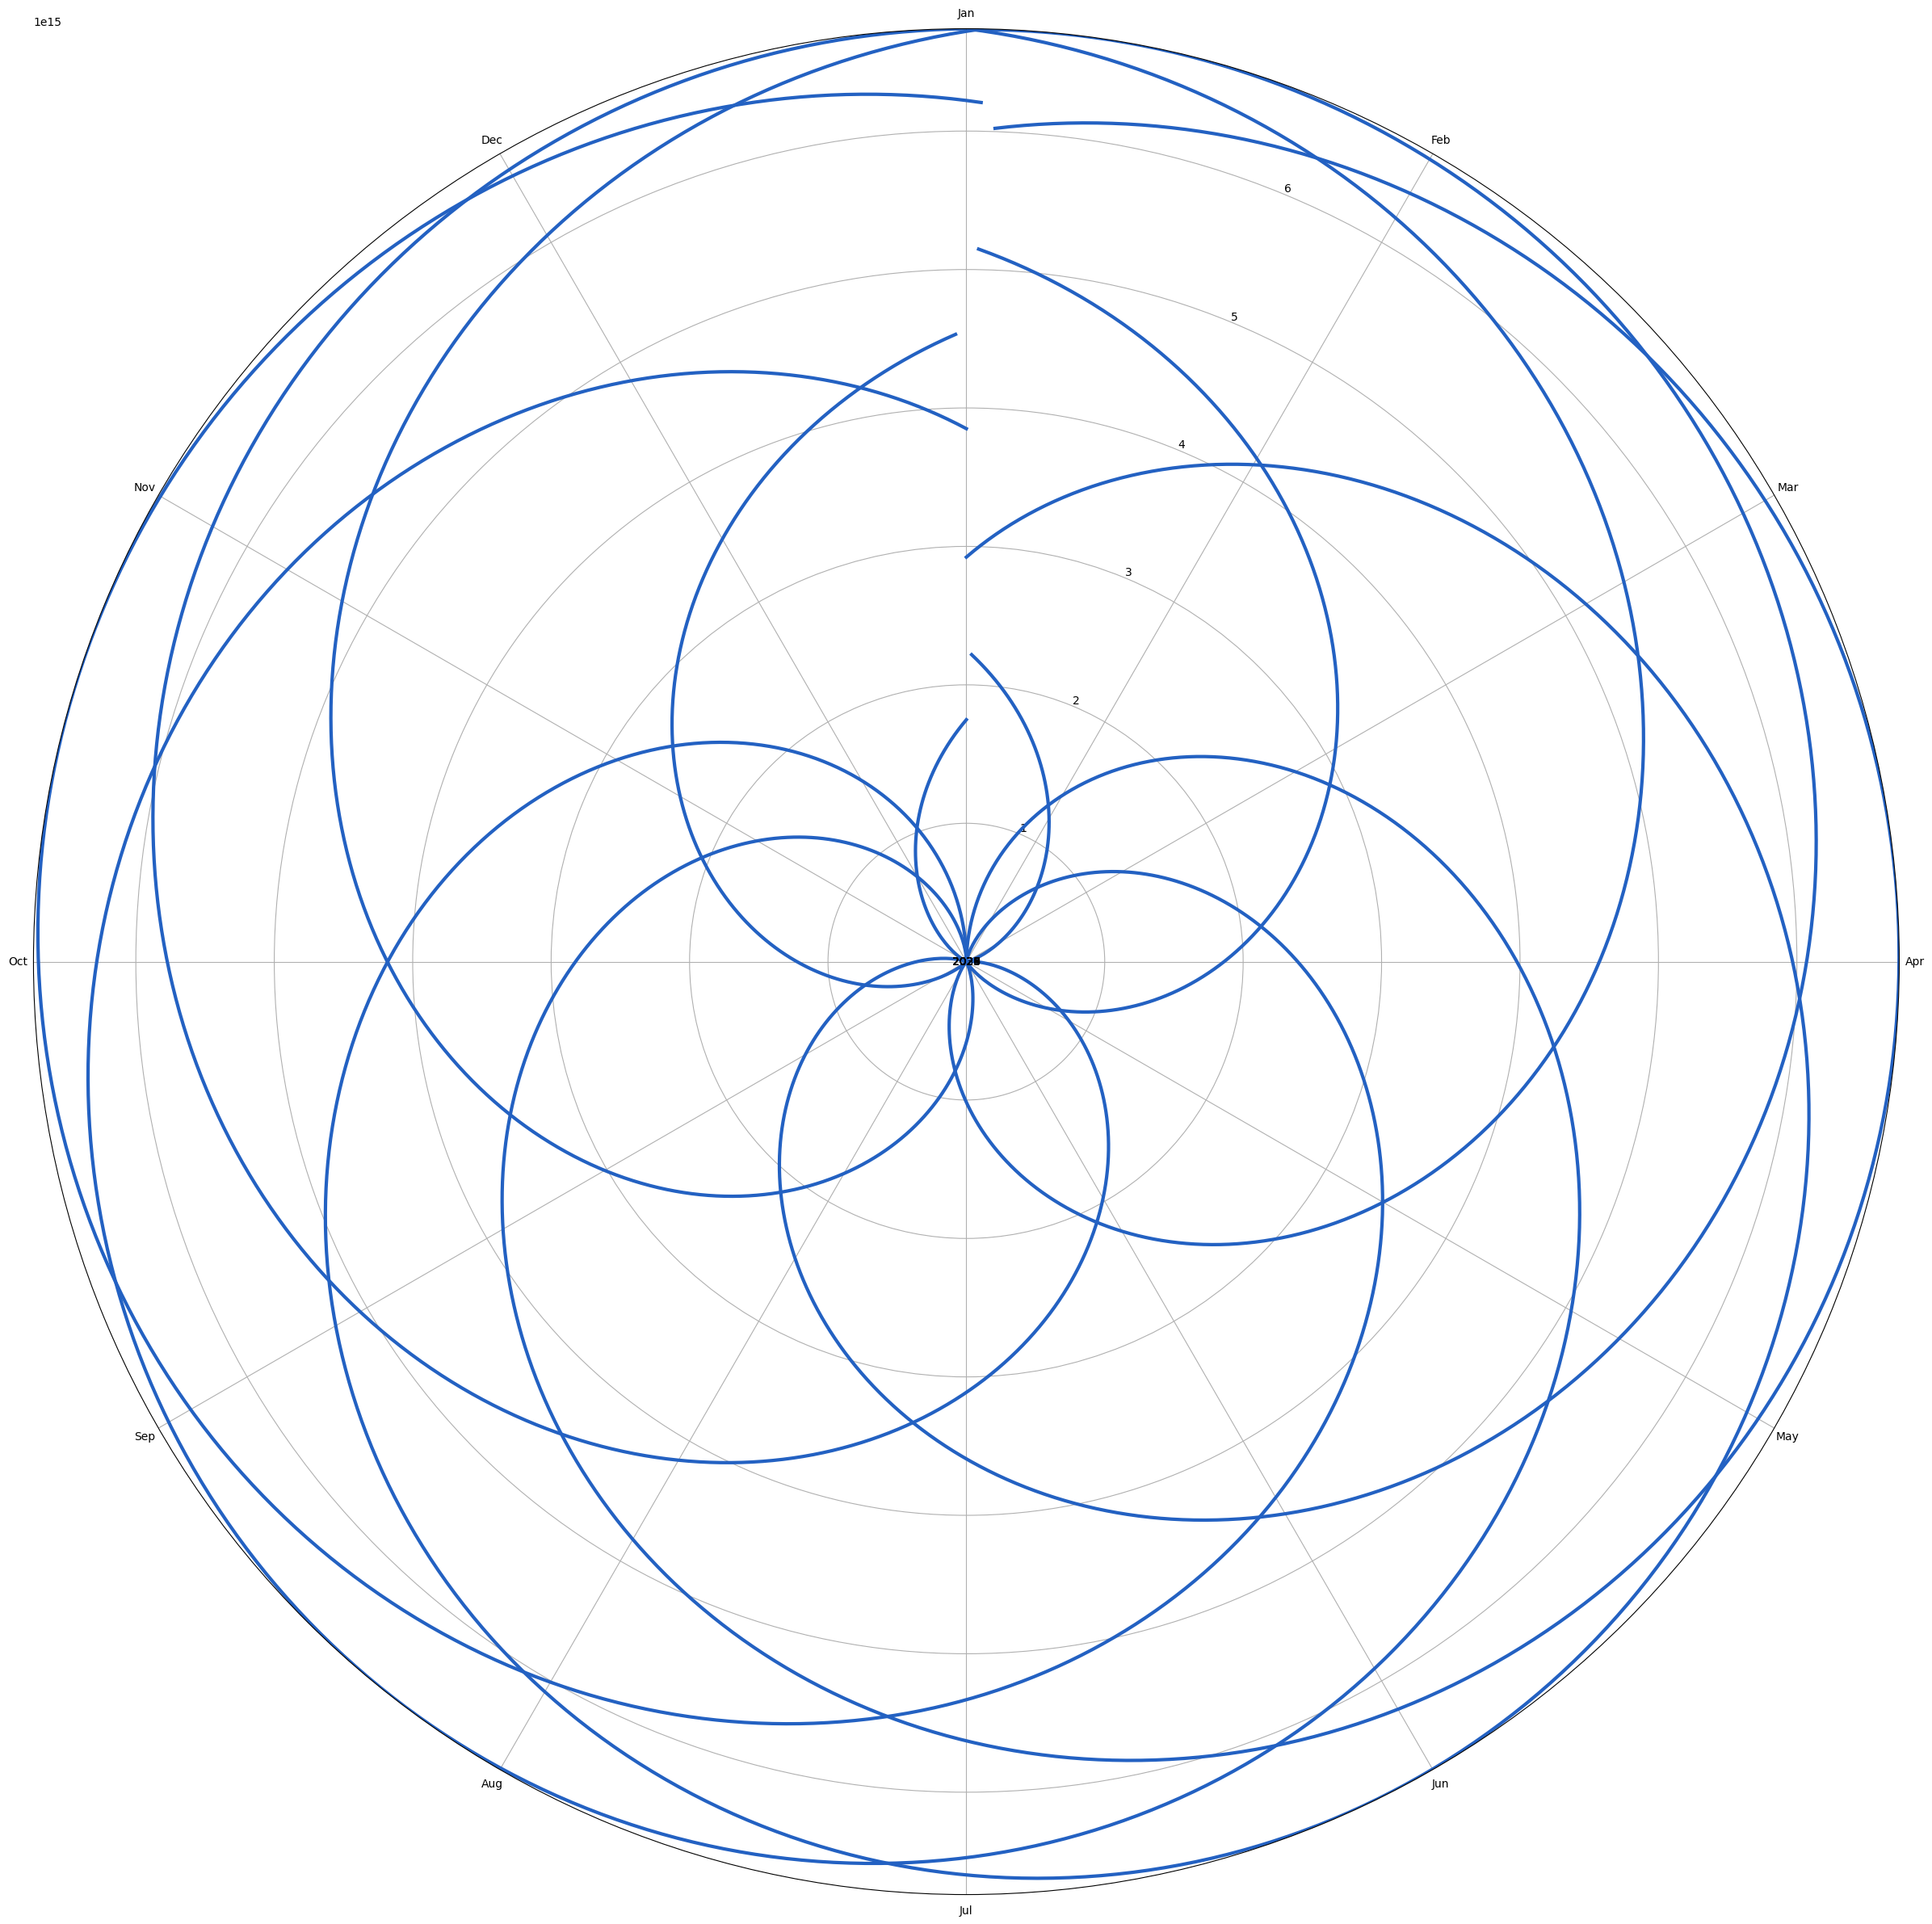

In [9]:
# Load data
df = _df
# df = _df.tail(1000)
print(df)

# Determine angle offset for start date
start_date = df.index.min()
start_day_of_year = start_date.timetuple().tm_yday
angle_offset = 2 * np.pi * (start_day_of_year - 1) / 365

# Determine angles for each data point
dates = df.index
days_since_start = (dates - start_date).days
angles = 2 * np.pi * days_since_start / 365 + angle_offset

# Normalize data for each year
data = df.values
years = df.index.year.values
normalized_data = np.zeros_like(data, dtype=float)

for year in np.unique(years):
    mask = years == year
    year_data = data[mask]
    year_min = np.min(year_data)
    year_range = np.max(year_data) - year_min
    normalized_data[mask] = (year_data - year_min) / year_range

# Adjust scaling of each spiral
padding = np.max(data) * 0.1
r = np.zeros_like(years, dtype=float)
    
for year in np.unique(years):
    mask = years == year
    r[mask] = (year + normalized_data[mask] * (1 + padding)) * np.max(data)

# Create polar chart
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(111, projection='polar')

# Determine the indices of Jan 01 in the data for all years
jan_01_idxs = np.where((df.index.month == 1) & (df.index.day == 1))[0]

# Plot the data for all years
for year in np.unique(years):
    mask = years == year
    year_angles = angles[mask]
    year_r = r[mask]
    ax.plot(year_angles, year_r, color='#2361c2', linewidth=3)
    # ax.plot(year_angles, year_r, linewidth=3)

    # Fill in the area corresponding to Jan 01 with white color
    year_jan_01_idxs = np.where(mask & (df.index.day == 1))[0]
    if len(year_jan_01_idxs) > 0:
        year_jan_01_angles = angles[year_jan_01_idxs]
        year_jan_01_r = r[year_jan_01_idxs]
        year_jan_01_angles = np.append(year_jan_01_angles, year_jan_01_angles[0])
        year_jan_01_r = np.append(year_jan_01_r, year_jan_01_r[0])
        ax.fill_between(year_jan_01_angles, year_jan_01_r, color='white')

# Add labels to rings
for year in np.unique(years):
    mask = years == year
    year_data = data[mask]
    year_max = np.max(year_data)
    year_pos = (year + 0.5) * np.max(data)
    ax.text(angle_offset, year_pos, str(year), ha='center', va='center', fontsize=10)

# Set y-axis limits
ax.set_rlim([np.min(r), np.max(r)])

# Customize chart
ticks = 2 * np.pi / 12 * np.arange(12)
ticklabels = [date.strftime('%b') for date in pd.date_range(start='2021-01-01', periods=12, freq='MS')]

ax.set_xticks(ticks)
ax.set_xticklabels(ticklabels)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)  # Set the direction of rotation to clockwise

plt.show()

